# Normalize Image Pixel Values
In computer vision, it is recommended to normalize image pixel values relative to the dataset mean and standard deviation. 

In [1]:
import sys;sys.path.insert(0, '..')
from src.crop import CropAroundBoundingBox
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from src.dog_data_set import DogPoseDataSet
from src.to_dtype import ToDtype
from src.rescale import Rescale
from src.normalize import Normalize
from src.to_image import ToImage
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

image_size = 96

## Reference https://kozodoi.me/blog/20210308/compute-image-stats 

composed_transforms = transforms.Compose([
    CropAroundBoundingBox(),
    # Important to rescale all images to a specific size
    Rescale(image_size), 
    # We want to cahnge the image to a float tensor that is scaled between [0, 1]
    ToDtype(dtype=torch.float32, scale=True),
    ToImage()
])

dog_pose_train_data_set = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12_new_split.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json",
    transform=composed_transforms)

first_sample = None

for i, sample in enumerate(dog_pose_train_data_set):
    first_sample = sample
    if (i == 0):
        break

normalized_image = first_sample

normalized_image

tensor([[[0.2471, 0.2314, 0.2157,  ..., 0.4627, 0.4784, 0.4706],
         [0.2314, 0.2196, 0.2118,  ..., 0.7020, 0.6118, 0.4627],
         [0.2196, 0.2078, 0.2118,  ..., 0.6039, 0.6510, 0.5059],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.0196, 0.0196, 0.0471],
         [1.0000, 1.0000, 1.0000,  ..., 0.0235, 0.0196, 0.0353],
         [1.0000, 1.0000, 1.0000,  ..., 0.0353, 0.0275, 0.0196]],

        [[0.1882, 0.1725, 0.1569,  ..., 0.4941, 0.5294, 0.5216],
         [0.1686, 0.1569, 0.1451,  ..., 0.6902, 0.6196, 0.4980],
         [0.1490, 0.1373, 0.1333,  ..., 0.5333, 0.6196, 0.5373],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.0196, 0.0196, 0.0471],
         [1.0000, 1.0000, 1.0000,  ..., 0.0235, 0.0196, 0.0353],
         [1.0000, 1.0000, 1.0000,  ..., 0.0392, 0.0314, 0.0275]],

        [[0.1765, 0.1608, 0.1373,  ..., 0.3176, 0.3216, 0.3098],
         [0.1529, 0.1373, 0.1216,  ..., 0.5804, 0.4902, 0.3137],
         [0.1255, 0.1098, 0.1098,  ..., 0.4392, 0.5412, 0.

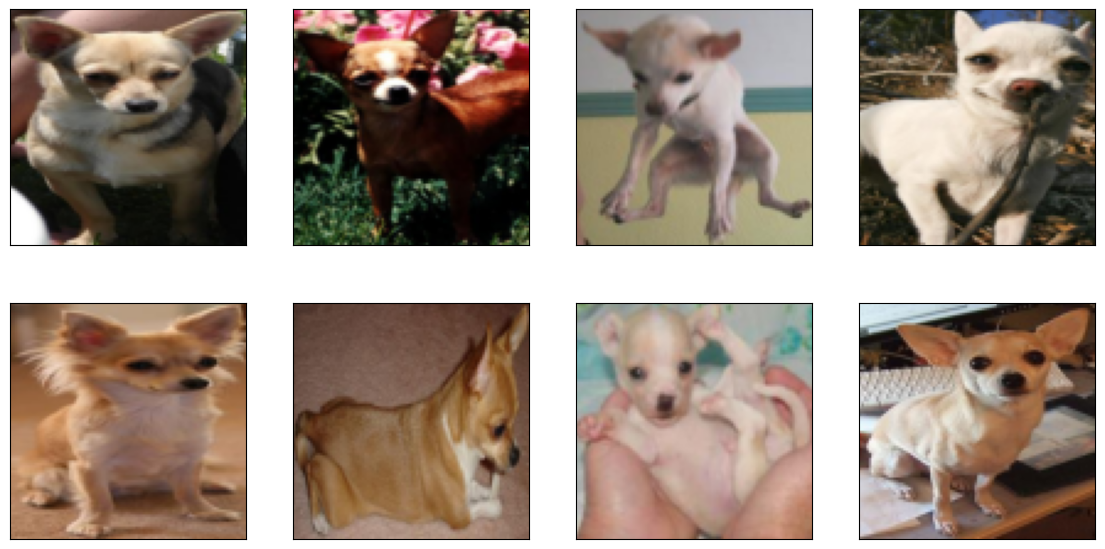

In [2]:
image_loader = DataLoader(
    dog_pose_train_data_set,
    batch_size=10,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
)

# display images
for batch_idx, inputs in enumerate(image_loader):
    fig = plt.figure(figsize=(14, 7))
    for i in range(8):
        ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
        plt.imshow(inputs[i].numpy().transpose(1, 2, 0))
    break

# Compute Mean & STD

In [3]:
####### COMPUTE MEAN / STD

# placeholders
psum = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

# loop through images
for inputs in tqdm(image_loader):
    psum += inputs.sum(axis=[0, 2, 3])
    psum_sq += (inputs**2).sum(axis=[0, 2, 3])

  0%|          | 0/914 [00:00<?, ?it/s]

# Final Calculations

In [4]:


# pixel count
print(f"len of dataset {len(dog_pose_train_data_set)}")
count = len(dog_pose_train_data_set) * image_size * image_size

# mean and std
total_mean = psum / count
total_var = (psum_sq / count) - (total_mean**2)
total_std = torch.sqrt(total_var)

# output
print("mean: " + str(total_mean))
print("std:  " + str(total_std))

len of dataset 9132
mean: tensor([0.4843, 0.4510, 0.3914])
std:  tensor([0.2508, 0.2434, 0.2458])


# Apply Normalization 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


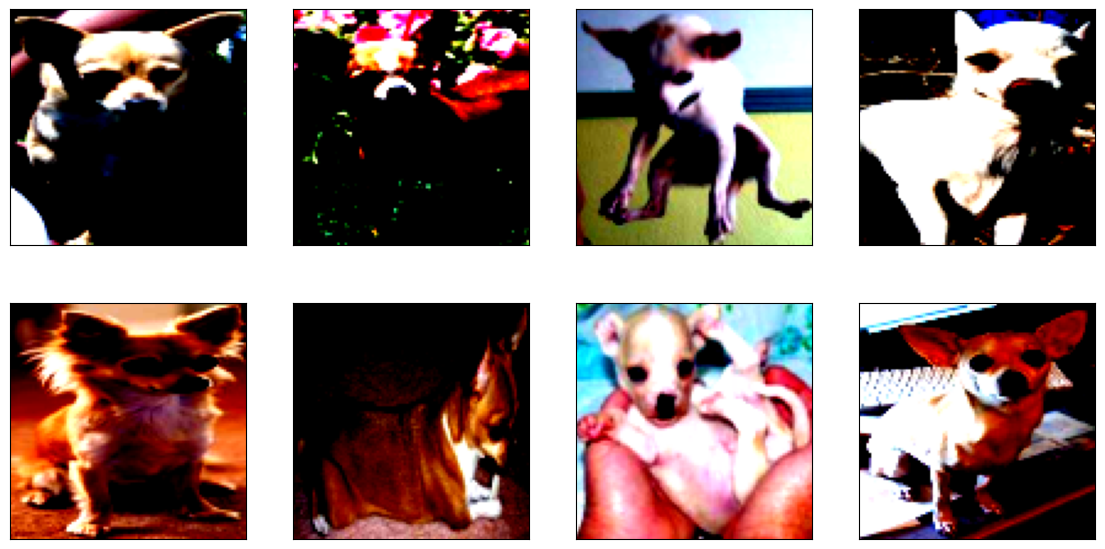

In [5]:

composed_transforms = transforms.Compose([
    CropAroundBoundingBox(),
    # Important to rescale all images to a specific size
    Rescale(image_size), 
    # We want to cahnge the image to a float tensor that is scaled between [0, 1]
    ToDtype(dtype=torch.float32, scale=True),
    Normalize(mean=total_mean, std=total_std),
    ToImage()
])

dog_pose_train_data_set = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12_new_split.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json",
    transform=composed_transforms)


normalized_image_loader = DataLoader(
    dog_pose_train_data_set,
    batch_size=10,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
)

# display images
for batch_idx, inputs in enumerate(normalized_image_loader):
    fig = plt.figure(figsize=(14, 7))
    for i in range(8):
        ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
        plt.imshow(inputs[i].numpy().transpose(1, 2, 0))
    break

In [6]:
composed_transforms = transforms.Compose([
    CropAroundBoundingBox(),
    # Important to rescale all images to a specific size
    Rescale(image_size), 
    # We want to cahnge the image to a float tensor that is scaled between [0, 1]
    ToDtype(dtype=torch.float32, scale=True),
    Normalize(mean=total_mean, std=total_std),
    ToDtype(dtype=torch.float32, scale=True),
    ToImage()
])

dog_pose_train_data_set = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12_new_split.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json",
    transform=composed_transforms)


normalized_image_loader = DataLoader(
    dog_pose_train_data_set,
    batch_size=10,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
)

for i, sample in enumerate(normalized_image_loader):
    first_sample = sample
    if (i == 0):
        break

normalized_image = first_sample

normalized_image.max()

tensor(2.4761)